# Laser scanning density calculator #

## Device and flight parameters ##

Using the characteristics of the _Livox Avia_ low cost laser scanning device.

### Device attributes ###
**R** = point cloud data rate (240 000 point/s for the _Livox Avia_)

**A** = transversal (orthogonal to the direction of advance) view angle

**B** = longitudinal (in the direction of advance) view angle

#### For the Livox Avia these parameters are:
R = 240 000 point/s

A = 70,4 º

B = 4,5 º

### Flight parameters ###
**h** = flight height

**v** = velocity

**w** = distance viewed from the device in the plane orthogonal to the advance direction, within the view angle A at a height h.

**areaf** = surface covered by the device in a given time t.
**t** = flight time as input.
**tf** = total duration of the flight as a result (total flight time).

#### Example flight parameters ####
h: low heights for LIDAR flights might be between 500 and 800 m; an average height is 1000 m; note that LIDAR devices have better capabilities than low cost laser sensors. The _Livox Avia_ has a detection range of just 450 m, that in low light conditions increases to 460 m. This means that 

v: for most consumer drones (low weight), speed might be between 40 and 60 mph; that is, 64.37 to 96.56 km/h, or 17.77 m/s to 26.82 m/s.

### Point density ###
**dl** =lineal point density, or points obtained per lineal meter in the direction orthogonal to the advance of the device in one second.

**ds** = surface point density, or points obtained per square meter in one second.

#### Reference point density ###
For this section we consider [Triglav _et al._ (2010)](https://www.geodetski-vestnik.com/en/clanek/10.15292/geodetski-vestnik.2010.03.403-416).

ds: 20 point/m<sup>2</sup> is often a good point density overall; however, many operators consider it an above-standard product wich costed more as of 2010.

Triglav _et al._ (2010) break down the distribution of points in strata, depending on the coberture.

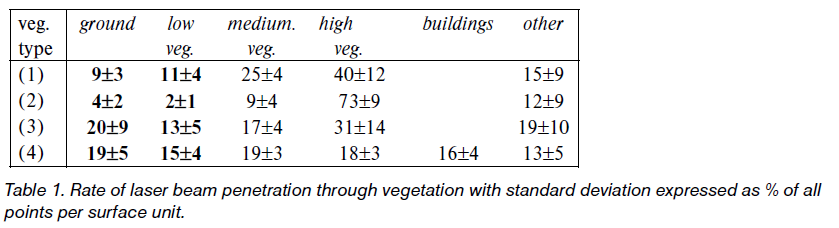
(1) scarce Mediterranean vegetation: bushes, thin deciduous trees; prevailing types: holm oak
(Quercus ilex), pubescent oak (Quercus pubescens), hop hornbeam (Ostrya carpinifolia),

(2) thermophilic forests of mixed deciduous trees with thick complex of tree vegetation;
prevailing types: mountain oak (Quercus petraea), field maple (Acer campestre), acacia (Robinia
pseudoacacia), white birch (Carpinus betulus),

(3) mixed vegetation: meadows, orchards and forest,

(4) built-up areas: buildings with included decorative sorts of shrubs and tree nurseries.

Triglav _et al._ (2010) recommend some point densities for topographic surveying. That is, considering the points that reach the ground. For an admissible error of 0.2 mm at the scale of the map, 1:5000 cartography admits 1 m of error, and 1:1000, 0,2 m.
The optimal for 1:1000 would then be 20 point/m<sup>2</sup>, for thermophile mediterranean forests, although 17 point/m<sup>2</sup> would be good enough. For 1:5000 the optimum would skyrocket to 3000 point/m<sup>2</sup>, but a good enough density would be 67 point/m<sup>2</sup>, if only a 6% of the pulses is reaching the ground.


In [21]:
import math

In [41]:
"""
Initialization of constants and variables

Later we will give values to the variables depending on whether we want to obtain
point density for given flight parameters or calculate flight parameters in order
to achieve a specific point density.
"""
# Device parameters [pulses/second], [sexagesimal degrees]
R = 240000
A = 70,4
B = 4,5
# Flight parameters [meter], [meter/second], [square meter], [second]
h = 1000
v = 20
w = 0
areaf = 0
t = 0
tf = 0
# Point density [point per cross-section meter], [point per square meter]
dl = 0
ds = 20

In [42]:
"""
Obtain point density from given flight parameters

At zero nadir angle
"""
w = 2*h*math.tan(35.2)
dl = R/w
print(f"For h = {h:.2f} m and v = {v:.2f} m/s:")
print(f"Width {w:.2f} m. Lineal density: {dl:.2f} point/m")
ds = dl/v
print (f"Point density ds = {ds:.2f}")
# Area covered per second, in square meters
t = 1
areaf = w*v*t
# Time that the device needs for covering 1000 hectare, in minutes
tf = 10000/((w*v)/60)
print(f"Area covered per second = {areaf:.2f} m2 or {areaf/10000:.2f} ha")
print(f"Area covered per minute = {areaf*60:.2f} m2 or {areaf*60/10000:.2f} ha")
print(f"Time required to cover 1000 hectares tf = {tf:.2f} minutes")



For h = 1000.00 m and v = 20.00 m/s:
Width 1496.81 m. Lineal density: 160.34 point/m
Point density ds = 8.02
Area covered per second = 29936.28 m2 or 2.99 ha
Area covered per minute = 1796176.81 m2 or 179.62 ha
Time required to cover 1000 hectares tf = 20.04 minutes


In [49]:
dmax = 450/math.cos(-35.2)
print(f"{dmax:.2f}")
print(math.cos(35.2))

-562.07
-0.8006117624589936


## Bibliography ##

Mihaela Triglav Čekada, Fabio Crosilla, Mojca Kosmatin Fras (2010). _Teoretična gostota lidarskih točk za topografsko kartiranje v največjih merilih. | Theoretical lidar point density for topographic mapping in the largest scales._ Geodetski vestnik, 54 (3), 403-416. DOI: 10.15292/geodetski-vestnik.2010.03.403-416